# Google-Data-Analytics-Cyclistic-Project
This is Data Analytics project that is part of Google Data Analytics course on Coursera. Case Study - How Does a Bike-Share Navigate Speedy Success?

# First Phase: Ask
Cyclistic is a company that offers a bike-share program that features more than 5,800 bicycles and 600 docking stations across Chicago. The director, Lily Moreno, has a goal to convert casual riders into annual members in order generate more revenue for the company. In order to achieve this, we are analyzing how annual members and casual riders use Cyclistic bikes differently. We have dataset for last one year to analyze and identify trends and generate insights. Casuals are identified as those who opted for single-ride passes or full-day passes, whereas members are identified as those who opted for an annual subscription.

From this study we are targetting to get

1. Total number of trips for members and casuals and their contribution in total trips.
2. Ride length for members and casual riders.
3. Common starting and ending station
4. Ride type used by casual and members

# Second Phase: Prepare
TO prepare for this task we have data of last 12 months from December 2021 to November 2022. The monthwise data is available in the repository of the Cyclistic. The data is public and privacy of the data is protected as it will not provide us private information of any rider. The dataset is provided by Motivate International Inc. under https://ride.divvybikes.com/data-license-agreement license.

We have total 13 columns in the dataset. 
1. ride_id: Unique id for each trip 
2. rideable_type: Type of bicycle used 
3. started_at: Time and date at which trip
4. started ended_at: Time and date at which trip ended
5. start_station_name: The name of the station at which the bicycle was hired
6. start_station_id: a unique identifier for the start station
7. end_station_name: The name of the station at which the trip ended
8. end_station_id: a unique identifier for the end station
9. start_lat: the latitude of the start station
10. start_lng: the longitude of the start station
11. end_lat: the latitude of the end station
12. end_lng: the longitude of the end station
13. member_casual: The type of user either member or casual

# Third Phase: Process
For the purpose of cleaning and processing the data we used Microsoft Excel and Python.

First of all we made the following changes in the excel

1. Step 1 - Get the data of ride time in minutes in the new column: ride_time We added new column and used excel formula to calculate ride time in minutes. =(D2-C2)*1440 meaning (ended_at - started_at)*1440

2. Step 2- Get the data of the day of the week when the ride started in the new column: start_day We added new column to get the data for the day of the week =TEXT(C2, "dddd") meaning TEXT(started_at, "dddd")

3. Step 3 - Get the data of the weekday in the new column: weekend_day We added new column to get the data and the formula we used is =IF(WEEKDAY(C2,2)<6,"Weekday","Weekend") meaning if started_at is less than the 6th day of the week (Monday to Friday) return "Weekday" else (Saturday and Sunday) return "Weekend".

4. Step 4 - Delete all the GPS data (start_lat, start_lng, end_lat, and end_lng) columns as they will not be used for analysis

5. Step 5 - Reduce the number of decimles of ride_time to 0.

Then we used python to club all the files into single dataframe. We will use python to process data from now onwards as number of rows are more than 5 millions and excel cannot process large datasets.

In [1]:
#import all the libraries
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
%matplotlib inline

In [2]:
# defining excel file folder
location = 'C:\\Users\\Shreyansh Palan\\Desktop\\Desktop documents\\Tripada data\\Tripada data\\Time data\\*.xlsx'
excel_files = glob.glob(location)

In [3]:
# defining dataframe for universe of trip data
tripdf = pd.DataFrame()

In [4]:
# creating a loop to read 12 files and concat the data into empty data frame
for excel_file in excel_files:
    df2 = pd.read_excel(excel_file)
    tripdf = pd.concat([tripdf,df2])

In [5]:
print(tripdf)

                 ride_id  rideable_type          started_at  \
0       46F8167220E4431F  electric_bike 2021-12-07 15:06:07   
1       73A77762838B32FD  electric_bike 2021-12-11 03:43:29   
2       4CF42452054F59C5  electric_bike 2021-12-15 23:10:28   
3       3278BA87BF698339   classic_bike 2021-12-26 16:16:10   
4       6FF54232576A3B73  electric_bike 2021-12-30 11:31:05   
...                  ...            ...                 ...   
337730  C349E243A9BAA6F7  electric_bike 2022-11-25 11:19:52   
337731  B0B4E85DA43A9194   classic_bike 2022-11-22 16:57:53   
337732  8D148DD47B59530B   classic_bike 2022-11-06 13:04:05   
337733  0D1170BA18FD33D1   classic_bike 2022-11-06 09:41:29   
337734  09B20DC75B5EA1E0  electric_bike 2022-11-26 11:59:28   

                  ended_at             start_station_name start_station_id  \
0      2021-12-07 15:13:42       Laflin St & Cullerton St            13307   
1      2021-12-11 04:10:23          LaSalle Dr & Huron St     KP1705001026   
2      20

# Fourth Phase: Analyze

We will start solving different task that we decided in the first phase

# 1. Total number of trips for members and casuals and their contribution in total trips.


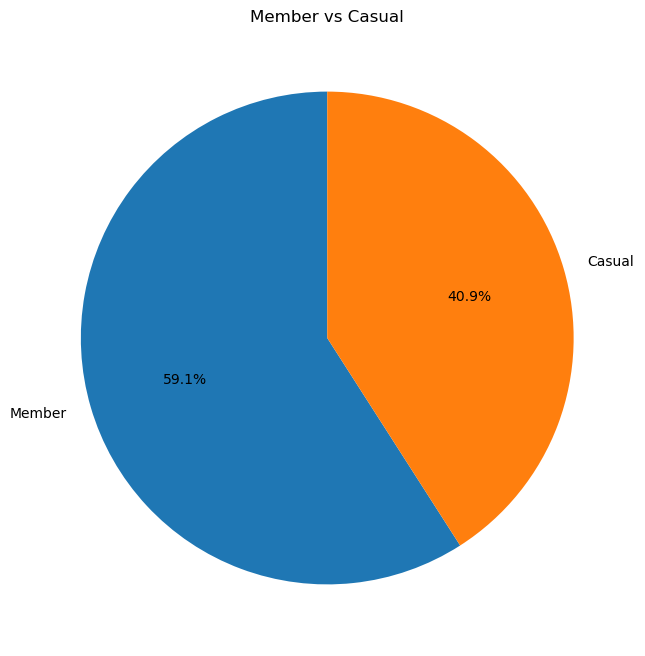

In [7]:
# pie chart that shows portion of rides from members and casuals

member_casual_count = tripdf['member_casual'].value_counts()

fig, ax = plt.subplots()

ax.pie(
        member_casual_count, 
        autopct='%1.1f%%', 
        labels = ['Member', 'Casual'],
        startangle=90,
    )

plt.title("Member vs Casual")
fig.set_size_inches([8, 8])

plt.show()

The chart clearly shows that 59.1% of the rides from members and 40.9% of the rides from casuals. Now let's move to second question.

# 2. Ride length for members and casual riders.

In [8]:


tripdf['ride_time'].round(2)

0           8
1          27
2          13
3          15
4          20
         ... 
337730     12
337731     34
337732      9
337733    336
337734     32
Name: ride_time, Length: 5733451, dtype: int64

In [9]:
# first check the statistical summary
ridesdf = tripdf['ride_time'].describe()

In [10]:
ridesdf.round(2)

count    5733451.00
mean          19.42
std          174.82
min       -10353.00
25%            6.00
50%           10.00
75%           19.00
max        41387.00
Name: ride_time, dtype: float64

The min shows negative value which means there are certain negative values in ride_time column so we will remove those values.

In [11]:
#let's take values where ride time is greater than or equal to one minutes assuming that below that negative values are all mistakes
# and 0 values are the cases where the rider changed his/her mind because
positive_trip_time = tripdf[tripdf['ride_time']>0]
positive_trip_time.shape

(5656970, 12)

In [12]:
positive_trip_time.describe().round(2)

,ride_time
count,5656970.00
mean,19.68
std,175.93
min,1.00
25%,6.00
50%,10.00
75%,19.00
max,41387.00


Now the mean time is 19 minutes which looks fair. Now that we have statistical values of the time spent by each rider, let us check values for memebers and casual.

In [13]:
# first of all let us define data for member and casual
member_only = positive_trip_time[positive_trip_time['member_casual'] == 'member']
casual_only = positive_trip_time[positive_trip_time['member_casual'] == 'casual']

In [23]:
# let's check statistical values for them individually
print('member')
print(member_only['ride_time'].describe().round(2))
print('\n')
print('casual')
print(casual_only['ride_time'].describe().round(2))

member
count    3340472.00
mean          12.88
std           28.77
min            1.00
25%            5.00
50%            9.00
75%           15.00
max         1560.00
Name: ride_time, dtype: float64


casual
count    2316498.00
mean          29.49
std          272.45
min            1.00
25%            8.00
50%           13.00
75%           24.00
max        41387.00
Name: ride_time, dtype: float64


The data clearly stats that mean time of casual rider (29.49) is much higher than mean time of member (12.88).

Now let us divide memeber and causal data and calculate mean for the purpose of plotting

In [14]:
divided_member_casual = positive_trip_time.groupby(['member_casual'], as_index = False)['ride_time']
avg_ride_time = divided_member_casual.apply(lambda x: np.mean(x))

<Figure size 1500x700 with 0 Axes>

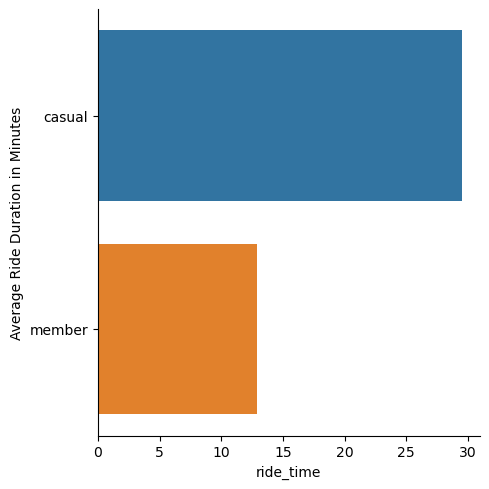

In [15]:
# now let us plot mean time on chart

df = pd.DataFrame(avg_ride_time)

plt.figure(figsize=[15,7])
ride_dur = sns.catplot(
    x = 'ride_time', 
    y = 'member_casual',
    data = df, 
    kind = 'bar')

ride_dur.set(
    ylabel = "Average Ride Duration in Minutes"
)

In [19]:
# now let us plot monthwise mean time on chart
#adding a new column containing the month name

tripdf['month_borrowed'] = pd.to_datetime(tripdf['started_at']).dt.strftime('%B %Y')

print(tripdf)

                 ride_id  rideable_type          started_at  \
0       46F8167220E4431F  electric_bike 2021-12-07 15:06:07   
1       73A77762838B32FD  electric_bike 2021-12-11 03:43:29   
2       4CF42452054F59C5  electric_bike 2021-12-15 23:10:28   
3       3278BA87BF698339   classic_bike 2021-12-26 16:16:10   
4       6FF54232576A3B73  electric_bike 2021-12-30 11:31:05   
...                  ...            ...                 ...   
337730  C349E243A9BAA6F7  electric_bike 2022-11-25 11:19:52   
337731  B0B4E85DA43A9194   classic_bike 2022-11-22 16:57:53   
337732  8D148DD47B59530B   classic_bike 2022-11-06 13:04:05   
337733  0D1170BA18FD33D1   classic_bike 2022-11-06 09:41:29   
337734  09B20DC75B5EA1E0  electric_bike 2022-11-26 11:59:28   

                  ended_at             start_station_name start_station_id  \
0      2021-12-07 15:13:42       Laflin St & Cullerton St            13307   
1      2021-12-11 04:10:23          LaSalle Dr & Huron St     KP1705001026   
2      20

In [20]:
# now let us again remove the rows where ride_time is less than 0

positive_trip_time = tripdf[tripdf['ride_time']>0]
positive_trip_time.shape

(5656970, 13)

In [21]:
monthly_ride_duration = positive_trip_time.groupby('month_borrowed')['ride_time'].describe()
print (monthly_ride_duration)

                   count       mean         std  min  25%   50%   75%      max
month_borrowed                                                                
April 2022      366226.0  17.876213  125.551912  1.0  5.0  10.0  18.0  21122.0
August 2022     775007.0  20.948055  193.808670  1.0  6.0  11.0  20.0  28129.0
December 2021   244991.0  14.673625  117.506922  1.0  5.0   9.0  15.0  30401.0
February 2022   113838.0  14.460330   82.793359  1.0  5.0   8.0  14.0  10906.0
January 2022    102620.0  15.435792  179.207965  1.0  5.0   8.0  14.0  29271.0
July 2022       812420.0  21.681178  174.765932  1.0  7.0  12.0  21.0  34209.0
June 2022       759333.0  22.977165  216.599370  1.0  7.0  12.0  21.0  35821.0
March 2022      280703.0  18.716498  147.777414  1.0  5.0  10.0  18.0  34354.0
May 2022        626755.0  21.369545  137.018634  1.0  7.0  12.0  21.0  36258.0
November 2022   332719.0  14.376182  119.647133  1.0  5.0   8.0  14.0  19613.0
October 2022    550515.0  17.613246  210.984166  1.0

In [23]:
# now let us divided the data by month_borrowed and member_casual and calculate the mean time for each month and member_casual
grouped = positive_trip_time.groupby(['month_borrowed', 'member_casual'], as_index = False)['ride_time']
ride_avg = grouped.apply(lambda x: np.mean(x))

In [26]:
# now let us sort the dataframe monthwise
df = pd.DataFrame(ride_avg)
df['month_borrowed'] = pd.to_datetime(df['month_borrowed'])
df = df.sort_values(by = 'month_borrowed')

df['month_borrowed'] = pd.to_datetime(df['month_borrowed']).dt.strftime('%B %Y')

<Figure size 1500x700 with 0 Axes>

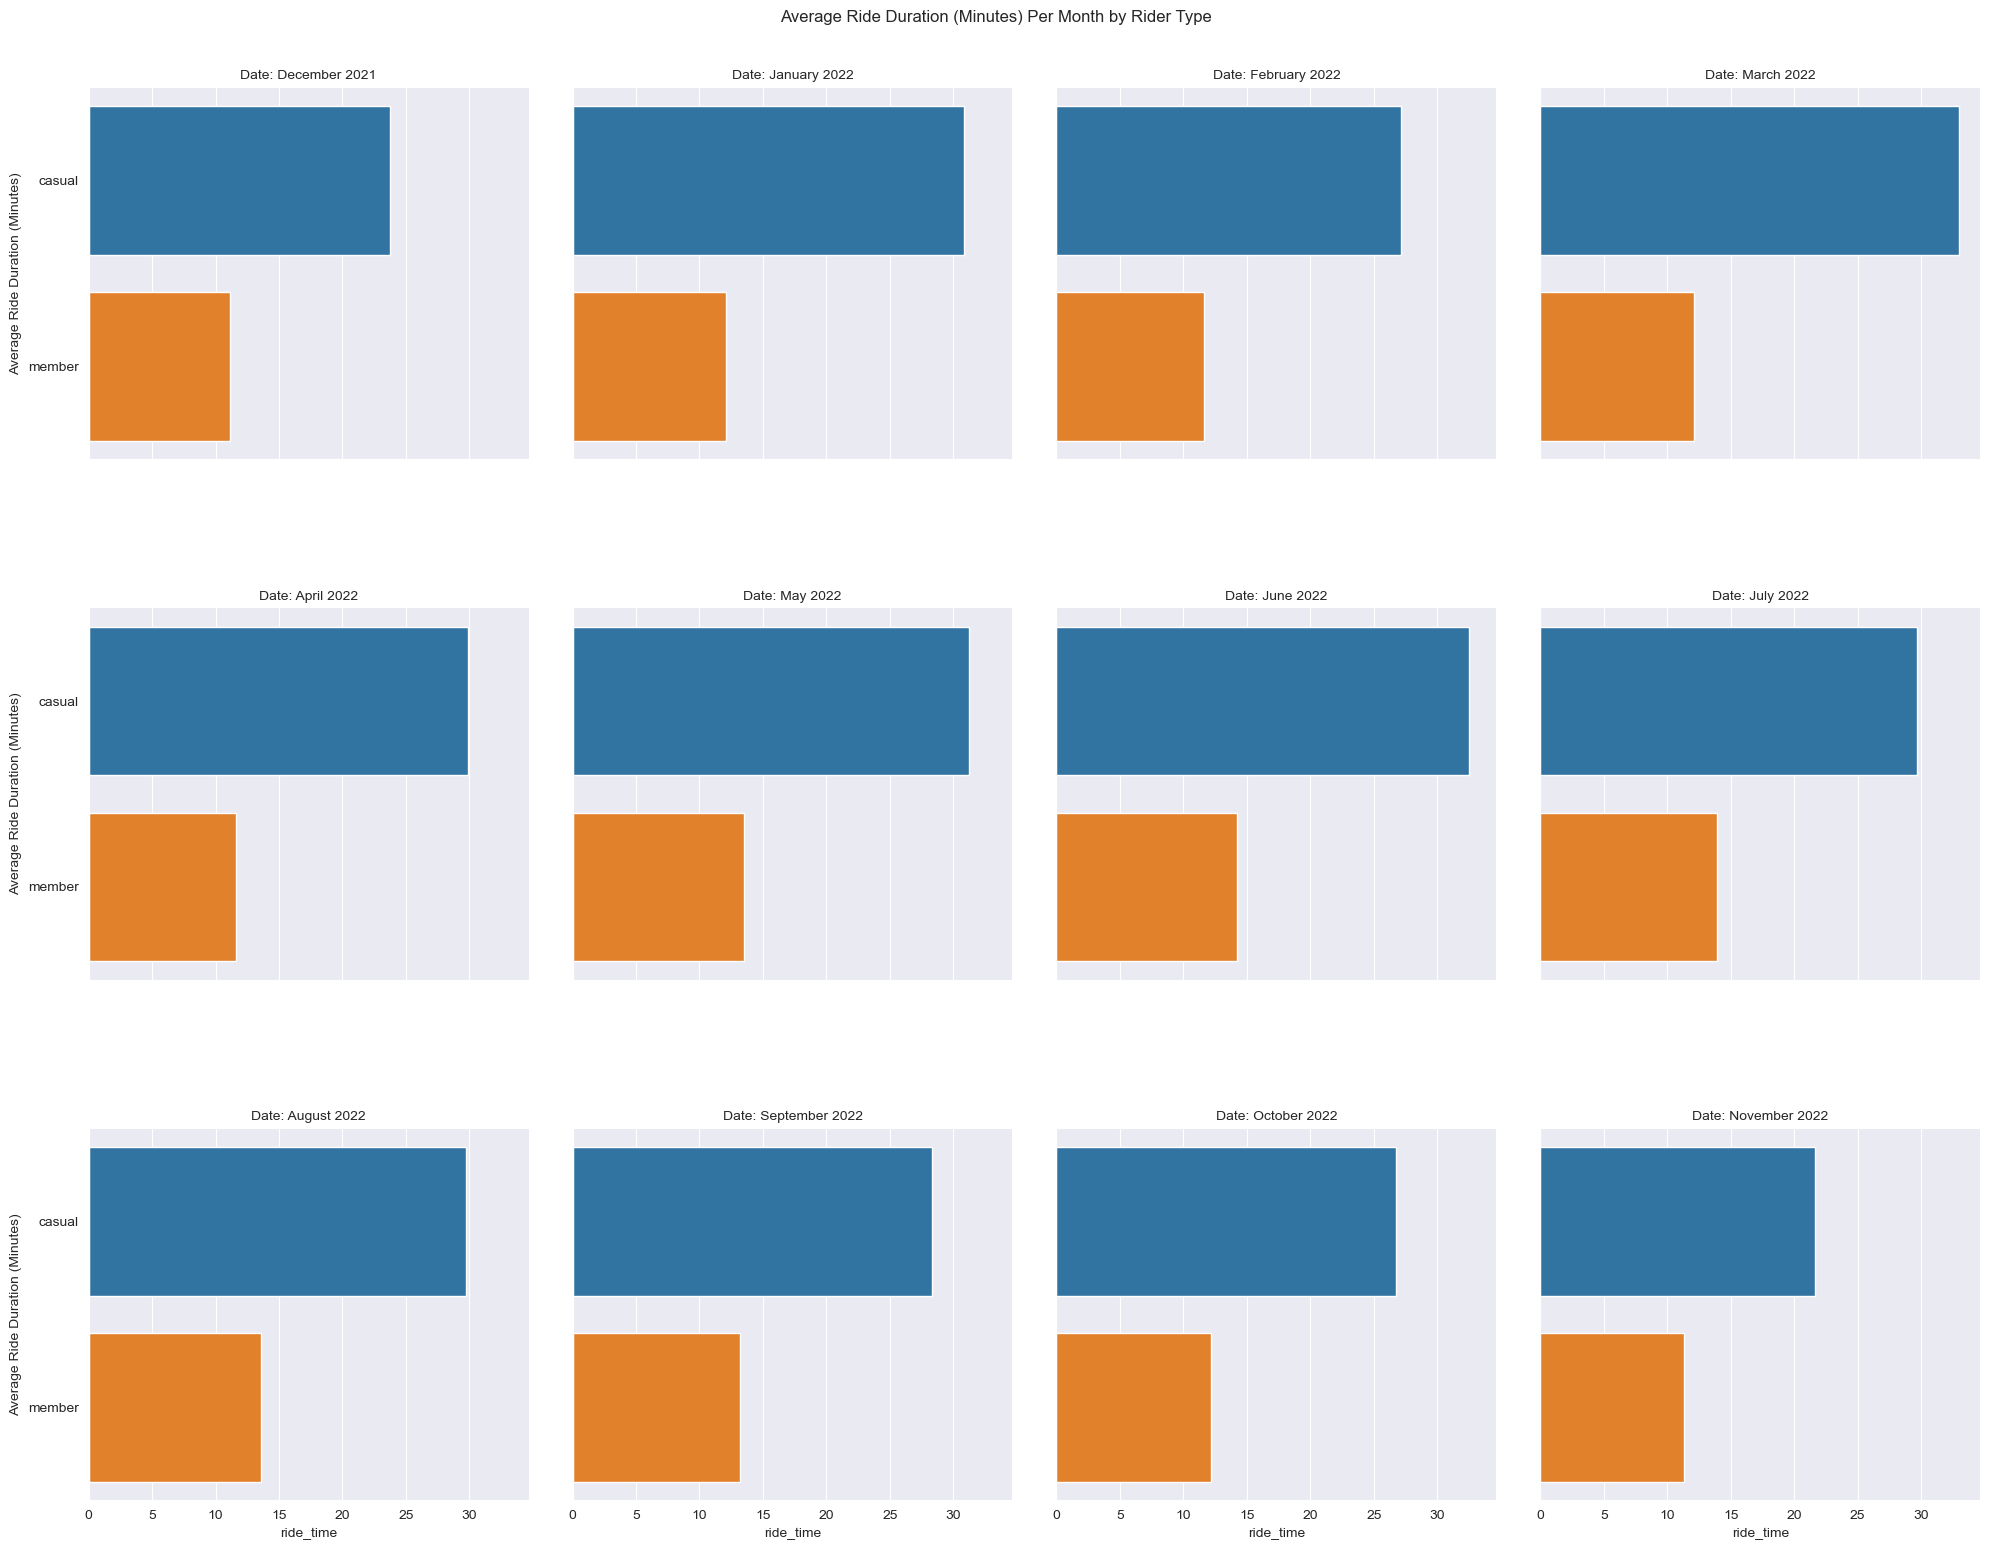

In [27]:
# now let us plot monthly charts for average rides
sns.set_style("darkgrid")

plt.figure(figsize=[15,7])
ride_dur = sns.catplot(
    x = 'ride_time', 
    y = 'member_casual',
    data = df, 
    col = 'month_borrowed',
    col_wrap = 4,
    kind = 'bar')

ride_dur.set(
    ylabel = "Average Ride Duration (Minutes)"
)

ride_dur.fig.suptitle('Average Ride Duration (Minutes) Per Month by Rider Type',  y = 1.03)
ride_dur.set_titles("Date: {col_name}")
plt.subplots_adjust(hspace=0.4, wspace=0.1)

We can make following conclusions out of given data 
1) Average ride time of casual is greater than of members
2) Average ride time in the period of September to February is much lower than other months


Now let us check the relation between number of rides and day of the week.

In [28]:
# let us again define data for member and casual
member_only = positive_trip_time[positive_trip_time['member_casual'] == 'member']
casual_only = positive_trip_time[positive_trip_time['member_casual'] == 'casual']

[Text(0.5, 0, 'Day of the Week'), Text(0, 0.5, 'Number of rides')]

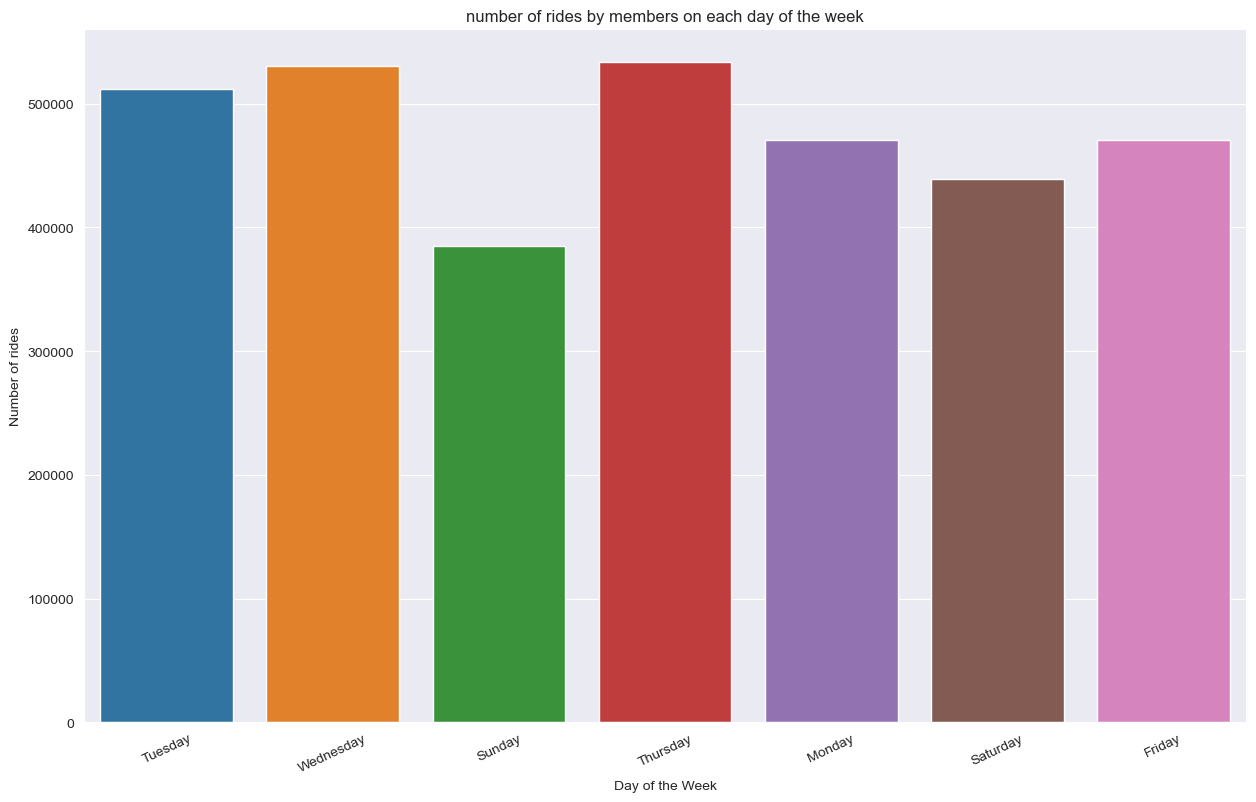

In [29]:
# now lets check on which days member rent the bikes

fig, ax = plt.subplots(figsize=(15,9))

start_day = sns.countplot(
    data = member_only,
    x = 'start_day',
    ax = ax
)

start_day.set_title('number of rides by members on each day of the week')
plt.xticks(rotation = 25)

start_day.set(xlabel = 'Day of the Week', ylabel = 'Number of rides')

[Text(0.5, 0, 'Day of the Week'), Text(0, 0.5, 'Number of rides')]

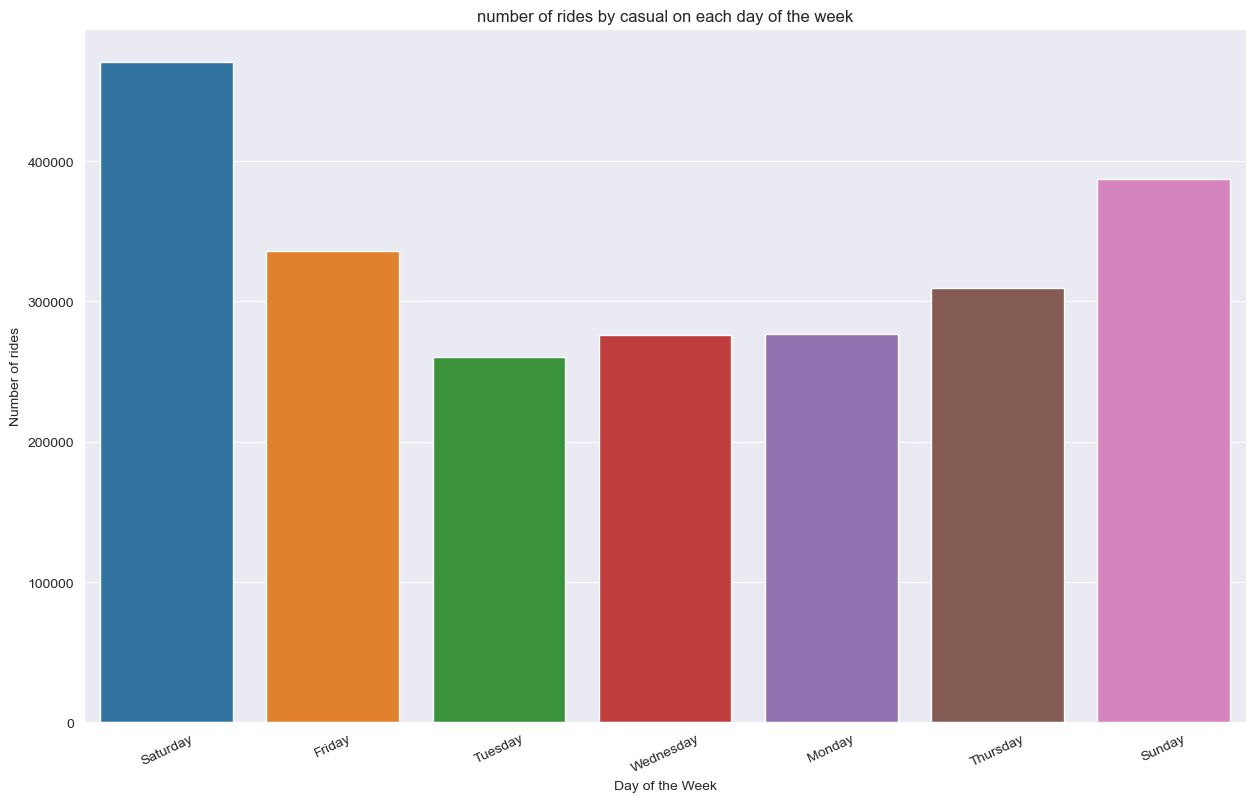

In [30]:
# now lets check on which days casual rent the bikes

fig, ax = plt.subplots(figsize=(15,9))

start_day = sns.countplot(
    data = casual_only,
    x = 'start_day',
    ax = ax
)

start_day.set_title('number of rides by casual on each day of the week')
plt.xticks(rotation = 25)

start_day.set(xlabel = 'Day of the Week', ylabel = 'Number of rides')

Form the given data we can conclude following things
1) Casual use the data mostly on Saturday and Sunday.
2) Casual are not using the ride to go to work but for fun or some adventure.
3) On the other hand members are taking least number of rides on weekends.

# 3. Common starting and ending stations

For that let us calculate total number of rides from top 10 stations for members and casuals


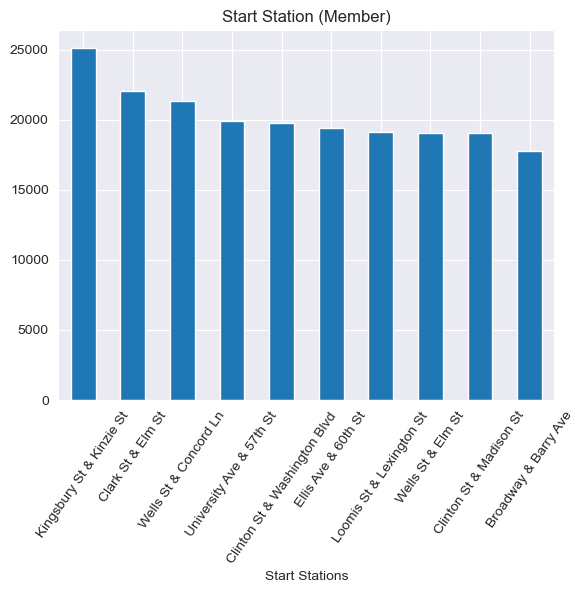

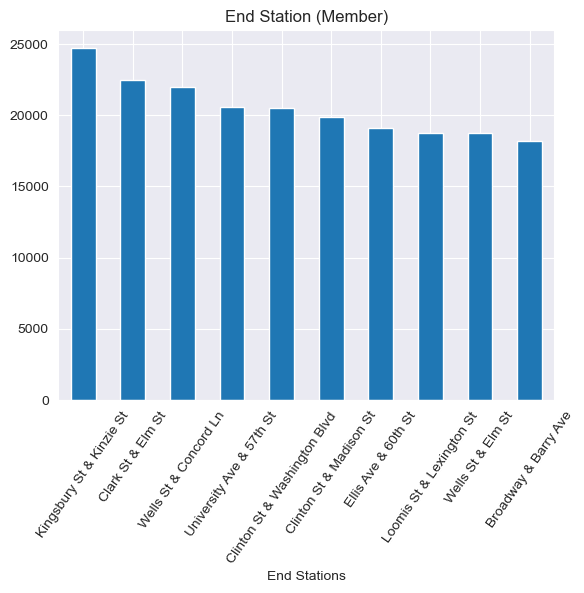

In [34]:
# Let us calculate for member first and plot them on the bar chart

top_10_start_station_member = member_only["start_station_name"].value_counts().head(10).plot(kind = 'bar', rot = 55, title = "Start Station (Member)", xlabel = 'Start Stations')
plt.show()
top_10_end_station_member = member_only["end_station_name"].value_counts().head(10).plot(kind = 'bar', rot = 55, title = "End Station (Member)", xlabel = 'End Stations')
plt.show()

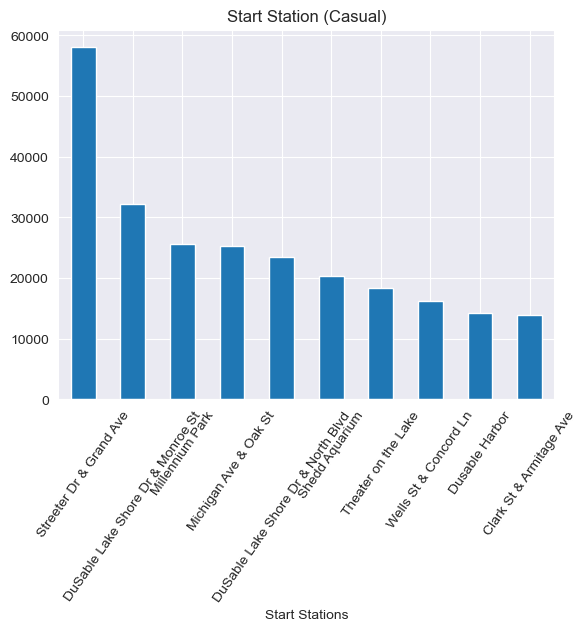

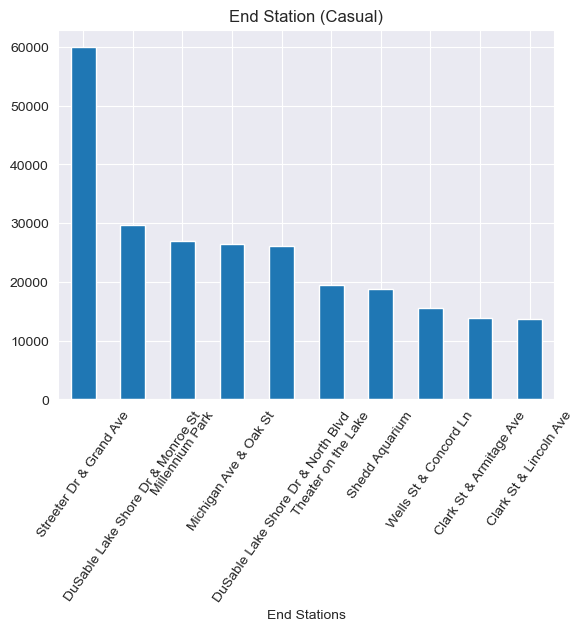

In [35]:
top_10_start_station_casual = casual_only["start_station_name"].value_counts().head(10).plot(kind = 'bar', rot = 55, title = "Start Station (Casual)", xlabel = 'Start Stations')
plt.show()
top_10_end_station_casual = casual_only["end_station_name"].value_counts().head(10).plot(kind = 'bar', rot = 55, title = "End Station (Casual)", xlabel = 'End Stations')
plt.show()

Streeter Dr & Grand Ave is the station which has most number of rides by casual followed by DuSable Lake Shore Dr & Monroe St. So company could put marketing efforts at Streeter Dr & Grand Ave the most followed by other nine locations.

# 4. Ride type used by casual and member

In [36]:
# First of all let us check values for ride_type

ride_type_summary = positive_trip_time.groupby('month_borrowed')['rideable_type'].describe().sort_values(by = "count", ascending = False)


print(ride_type_summary)

                 count unique            top    freq
month_borrowed                                      
July 2022       812420      3  electric_bike  412045
August 2022     775007      3  electric_bike  408022
June 2022       759333      3   classic_bike  402588
September 2022  691843      3  electric_bike  368872
May 2022        626755      3   classic_bike  320712
October 2022    550515      3  electric_bike  326386
April 2022      366226      3  electric_bike  188874
November 2022   332719      3  electric_bike  183577
March 2022      280703      3  electric_bike  139085
December 2021   244991      3  electric_bike  140224
February 2022   113838      3   classic_bike   58737
January 2022    102620      3   classic_bike   54666


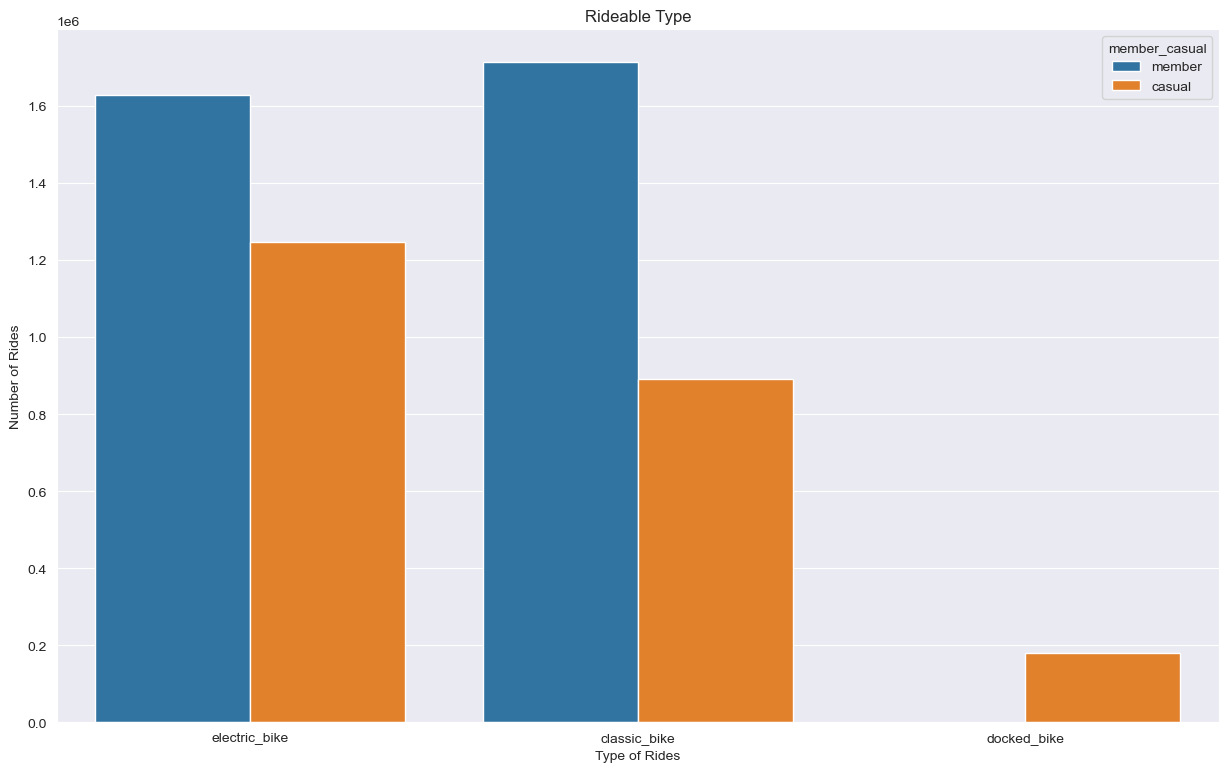

In [37]:
ride_type = positive_trip_time['rideable_type'].value_counts(normalize = True)

fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=(15,9))

ride_p = sns.countplot(
    data = positive_trip_time,
    x = 'rideable_type',
    hue = 'member_casual',
    ax = ax
)

ride_p.set_title('Rideable Type')
ride_p.set(xlabel = 'Type of Rides', ylabel = 'Number of Rides')

plt.show()

Text(0.5, 1.03, 'Monthly Trips by Rideable Types (Member)')

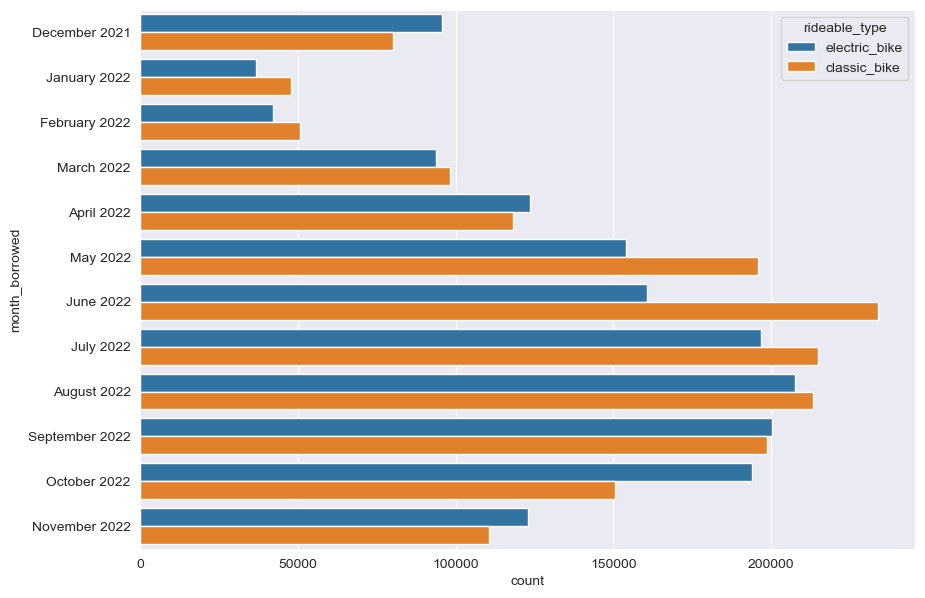

In [49]:
# The data shows that the casual prepfer the electric_bike the most followed by classic_bike, and followed by docked_bike

# now let us plot monthwise use of different bikes for members

fig_dims = (10, 7)
fig, ax = plt.subplots(figsize = fig_dims)

ride_type_monthly_member = sns.countplot(
    data = member_only,
    y = 'month_borrowed',
    hue = 'rideable_type',
    ax = ax
)

ride_p.set(xlabel = 'Total Monthly Trips', ylabel = 'Month Borrowed')
ride_p.set_title('Monthly Trips by Rideable Types (Member)',  y = 1.03)

Text(0.5, 1.03, 'Monthly Trips by Rideable Types (Casual)')

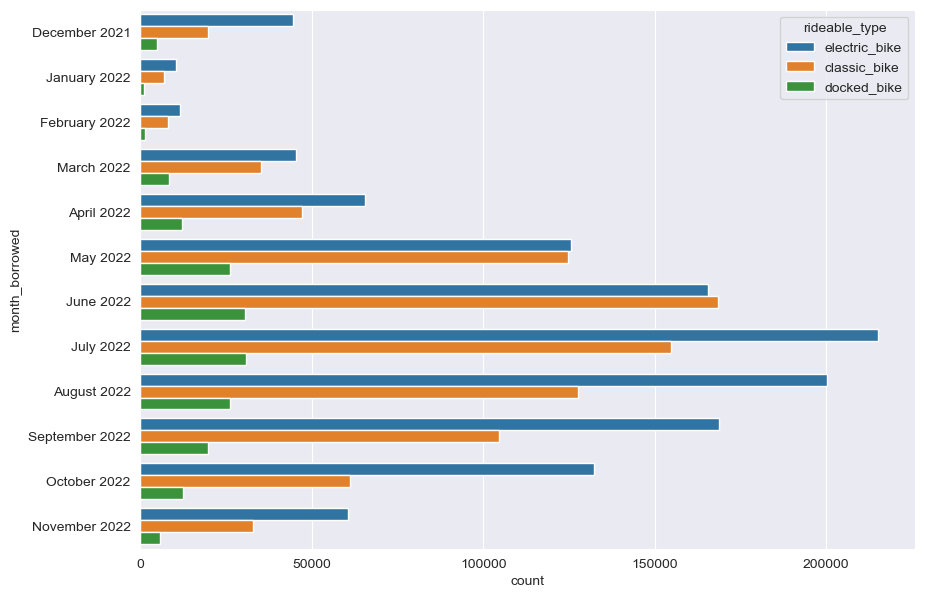

In [50]:
# now let us plot monthwise use of different bikes for casual
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize = fig_dims)

ride_type_monthly_casual = sns.countplot(
    data = casual_only,
    y = 'month_borrowed',
    hue = 'rideable_type',
    ax = ax
)

ride_p.set(xlabel = 'Total Monthly Trips', ylabel = 'Month Borrowed')
ride_p.set_title('Monthly Trips by Rideable Types (Casual)',  y = 1.03)

The numbers clearly shows that casual preferes electric_bike over any other type. So the company could target casual keeping in mind more use of electric_bike.

# Fifth and Sixth Phase: Share and Act

Based on the analysis of the data, I have reached the following conclusions
1. Number of rides for member is 59% and for casual is 40% but average ride time of casual is much higher than of member. So casual has much higher weighted ride time. Targetting them for subscription could be really have good impact on top line of the company.
2. Company should focus more on converting casual into member by marketing in the period of March to August and should promote more use of rides in the period of September to February.
3. Purpose of casual rider seems different than of member rider. Casual riders use bike on Saturday and Sunday so it looks like they use the bike for workout or for the purpose of adventure trip on the other hand casual rider use the bike more on weekdays to commute to work. So marketing team should focus more on promote membership in a way that is more attractive to casual riders.
4. Streeter Dr & Grand Ave is the start and end station for most of the casual rides. Some event or promotion could be done at the location to promote membership.
5. Casual riders prefer electric_bike over any other bike so the company should promote the membership in such a way that is more benefitial for the riders that are using electric_bike.